# Data Visulization and Metrics
This Notebook provides plots and metrics to understand yhe behavior of each variable and get first hints about which variables could be informative for the Oscar prediction task. It can also be helpful to spot outliers and get information about what kind of processing needs to be performed. 

In [14]:
import matplotlib.pyplot as plt
import polars as pl 
import pandas as pd
import seaborn as sns 
import numpy as np

In [ ]:
df = pl.read_csv('../data/final_oscar_data.csv')
winners_df = df.filter(pl.col("winner") == 1)
nominees_df = df.filter(pl.col("winner") == 0)
df

tconst,film,year_film,genres,averageRating,dir_won_before,budget,nb_actor_won_before,won_bafta,won_gg_drama,won_gg_comedy,winner,runtimeMinutes
str,str,i64,str,f64,i64,f64,i64,i64,i64,i64,i64,i64
"""tt0018379""","""7thheaven""",1927,"""Drama,Romance""",7.5,0,null,0,0,0,0,0,110
"""tt0018578""","""wings""",1927,"""Action,Drama,Romance""",7.5,0,2e6,0,0,0,0,1,144
"""tt0019257""","""thepatriot""",1928,"""Drama,History,Thriller""",6.1,0,null,2,0,0,0,0,113
"""tt0019304""","""theracket""",1927,"""Crime,Drama,Film-Noir""",6.6,0,null,0,0,0,0,0,84
"""tt0019630""","""alibi""",1928,"""Action,Crime,Romance""",5.6,0,null,0,0,0,0,0,91
…,…,…,…,…,…,…,…,…,…,…,…,…
"""tt8999762""","""thebrutalist""",2024,"""Drama""",7.4,0,9.6e6,1,0,1,0,0,216
"""tt9620288""","""kingrichard""",2021,"""Biography,Drama,Sport""",7.5,0,null,0,0,0,0,0,144
"""tt9620292""","""promisingyoungwoman""",2020,"""Crime,Drama,Mystery""",7.5,0,1e7,0,0,0,0,0,113


## Ratings 
This section aims to explore the Average Ratings variable through plots and statistic metrics 

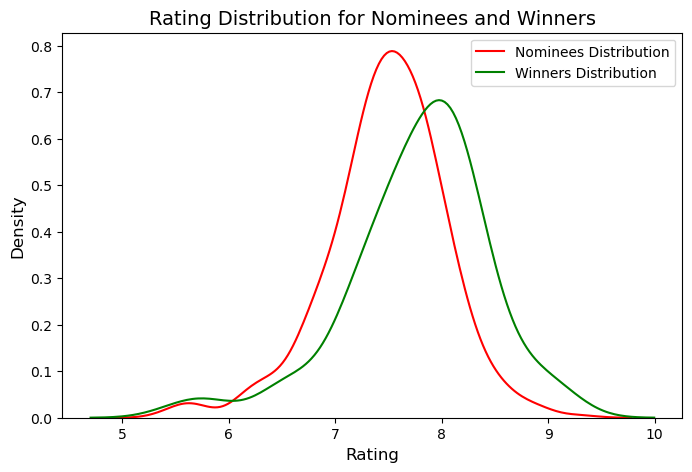

In [4]:
overall_ratings = df['averageRating']
winners_ratings = winners_df['averageRating']
nominees_ratings = nominees_df['averageRating']

#distribution plot
plt.figure(figsize=(8, 5))
sns.kdeplot(nominees_ratings, color='red', label='Nominees Distribution', fill=False)
sns.kdeplot(winners_ratings, color='green', label='Winners Distribution', fill=False)
plt.title('Rating Distribution for Nominees and Winners', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
plt.close()

The plot above illustrates the difference in rating distribution between winners and nominees. While the spread of the ratings is similar, the winners distribution is slightly more to the right, indicating that winners tend to have a higher average rating. This could indicate that rating is, as we might expect, an important information for our models.

In [5]:
df_clean_ratings = df.filter(df["averageRating"].is_not_null())
winners_df = df_clean_ratings.filter(pl.col("winner") == 1)
nominees_df = df_clean_ratings.filter(pl.col("winner") == 0)

overall_ratings = df_clean_ratings['averageRating'].to_list()
winners_ratings = winners_df['averageRating'].to_list()
nominees_ratings = nominees_df['averageRating'].to_list()

ratings_data = {
    'Group': ['Winners', 'Non-Winners', 'All Ratings'],
    'Mean': [np.mean(winners_ratings), np.mean(nominees_ratings), np.mean(overall_ratings)],
    'Median': [np.median(winners_ratings), np.median(nominees_ratings), np.median(overall_ratings)]
}
pl.DataFrame(ratings_data)

Group,Mean,Median
str,f64,f64
"""Winners""",7.773196,7.9
"""Non-Winners""",7.481128,7.5
"""All Ratings""",7.527496,7.6


The metrics above confirm the first conclusion made from the previous plot and highlights the difference in rating between winners and the other nominees.

## Budget 
This section aims to explore the budget variable through plots and statistic metrics. The budget variable is missing for a certain number of entries and will be handled carefully in the followin steps of the project. The plots and metrics below still offer an idea of its distribution and impact.

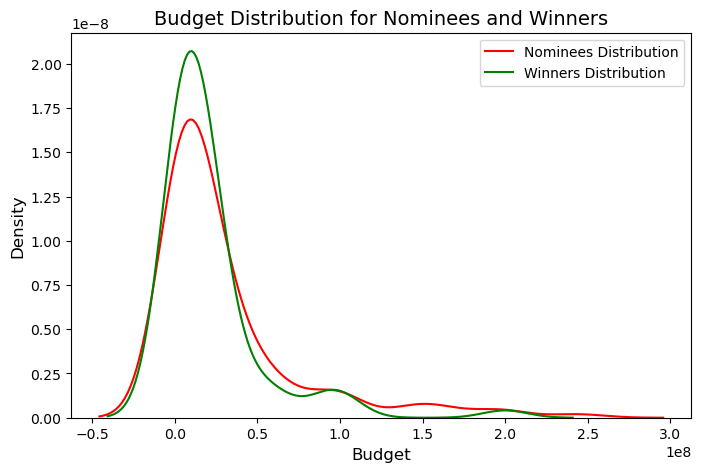

In [6]:
overall_budget = df['budget']
winners_budget = winners_df['budget']
nominees_budget = nominees_df['budget']

#distribution plot
plt.figure(figsize=(8, 5))
sns.kdeplot(nominees_budget, color='red', label='Nominees Distribution', fill=False)
sns.kdeplot(winners_budget, color='green', label='Winners Distribution', fill=False)
plt.title('Budget Distribution for Nominees and Winners', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
plt.close()

We get two key information, first, the budget distribution is right-skewed meaning more films have a lower budget. We can spot some outliers on the left of the curve implying we might need to log-transform the data if we use it in our models. Second, while it might be counterintuitive, winners are more concentrated around lower budgets. However, the difference in distribution between winners and nominees is not this significant., budget is probably not the strongest indicators. The statistics metrics below confirm this trend. 

In [7]:
df_clean_budgets = df.filter(df["budget"].is_not_null())
winners_budget_df = df_clean_budgets.filter(pl.col("winner") == 1)
nominees_budget_df = df_clean_budgets.filter(pl.col("winner") == 0)

overall_budget = df_clean_budgets["budget"].to_list()
winners_budget = winners_budget_df["budget"].to_list()
nominees_budget = nominees_budget_df["budget"].to_list()
budget_data = {
    'Group': ['Winners', 'Non-Winners', 'All Ratings'],
    'Mean': [np.mean(winners_budget), np.mean(nominees_budget), np.mean(overall_budget)],
    'Median': [np.median(winners_budget), np.median(nominees_budget), np.median(overall_budget)]
}

pl.DataFrame(budget_data)

Group,Mean,Median
str,f64,f64
"""Winners""",2.1428e7,1.32e7
"""Non-Winners""",3.1013e7,1.4e7
"""All Ratings""",2.8860e7,1.4e7


## Runtime
We do a similar analysis on the runtime of movies 

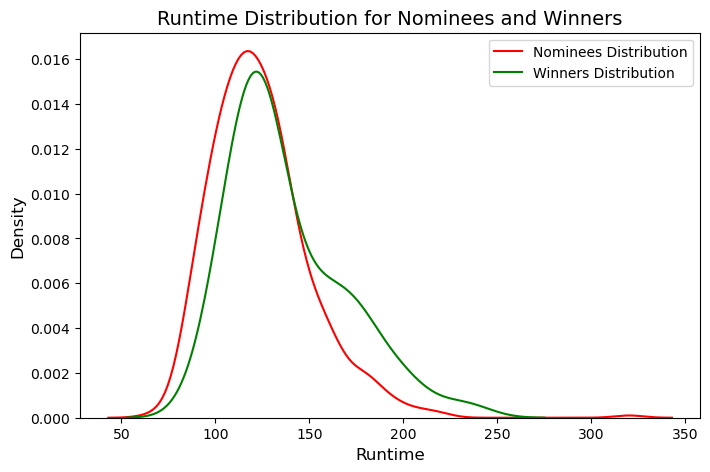

In [9]:
#Same for runtime
overall_runtimeMinutes = df['runtimeMinutes']
winners_runtimeMinutes = winners_df['runtimeMinutes']
nominees_runtimeMinutes = nominees_df['runtimeMinutes']

#distribution plot
plt.figure(figsize=(8, 5))
sns.kdeplot(nominees_runtimeMinutes, color='red', label='Nominees Distribution', fill=False)
sns.kdeplot(winners_runtimeMinutes, color='green', label='Winners Distribution', fill=False)
plt.title('Runtime Distribution for Nominees and Winners', fontsize=14)
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
plt.close()

 While both distributions are similar, winners tend to be slightly longer than the rest of the data set. This is once again confirmed by the metrics in the table below. 

In [11]:
df_clean_runtimeMinutess = df.filter(df["runtimeMinutes"].is_not_null())
winners_runtimeMinutes_df = df_clean_runtimeMinutess.filter(pl.col("winner") == 1)
nominees_runtimeMinutes_df = df_clean_runtimeMinutess.filter(pl.col("winner") == 0)

overall_runtimeMinutes = df_clean_runtimeMinutess["runtimeMinutes"].to_list()
winners_runtimeMinutes = winners_runtimeMinutes_df["runtimeMinutes"].to_list()
nominees_runtimeMinutes = nominees_runtimeMinutes_df["runtimeMinutes"].to_list()
runtimeMinutes_data = {
    'Group': ['Winners', 'Non-Winners', 'All Runtimes'],
    'Mean': [np.mean(winners_runtimeMinutes), np.mean(nominees_runtimeMinutes), np.mean(overall_runtimeMinutes)],
    'Median': [np.median(winners_runtimeMinutes), np.median(nominees_runtimeMinutes), np.median(overall_runtimeMinutes)]
}

pl.DataFrame(runtimeMinutes_data)

Group,Mean,Median
str,f64,f64
"""Winners""",138.010309,130.0
"""Non-Winners""",124.190661,120.0
"""All Runtimes""",126.384615,122.0


## Other awards won impact
This section studies the relationship between awards won prior to the Oscar, BAFTA and Golden Globes.

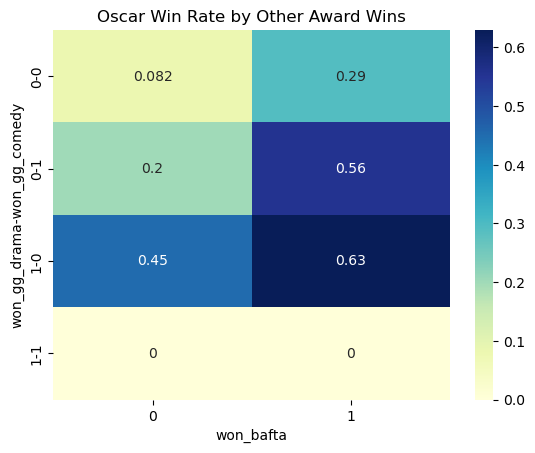

In [12]:
#HeatMap for other awards won
df_pandas = df.to_pandas()
combo = df_pandas.groupby(['won_gg_drama', 'won_gg_comedy', 'won_bafta'])['winner'].mean().unstack(fill_value=0)
sns.heatmap(combo, annot=True, cmap='YlGnBu')
plt.title("Oscar Win Rate by Other Award Wins")
plt.show()
plt.close()

On the heatmap above we can see, that winning awards have indeed great influence on the Oscar results. As an example, 63% of movies winning both the BAFTA and Golden Globes for best drama won the Oscar just after. On the other hand, the rate of Oscar winners among movies missing on the three other awards drops to 8.2%. The bottom line is 0 simply because it is impossible to win both Golden Globes prizes.

##  Genres 
We can now have a look at how winners and nominees are spread accross genres, the goal is to find what genres are over represennted among winners and to see if winners are in higher proportion than nominees for some genres. 

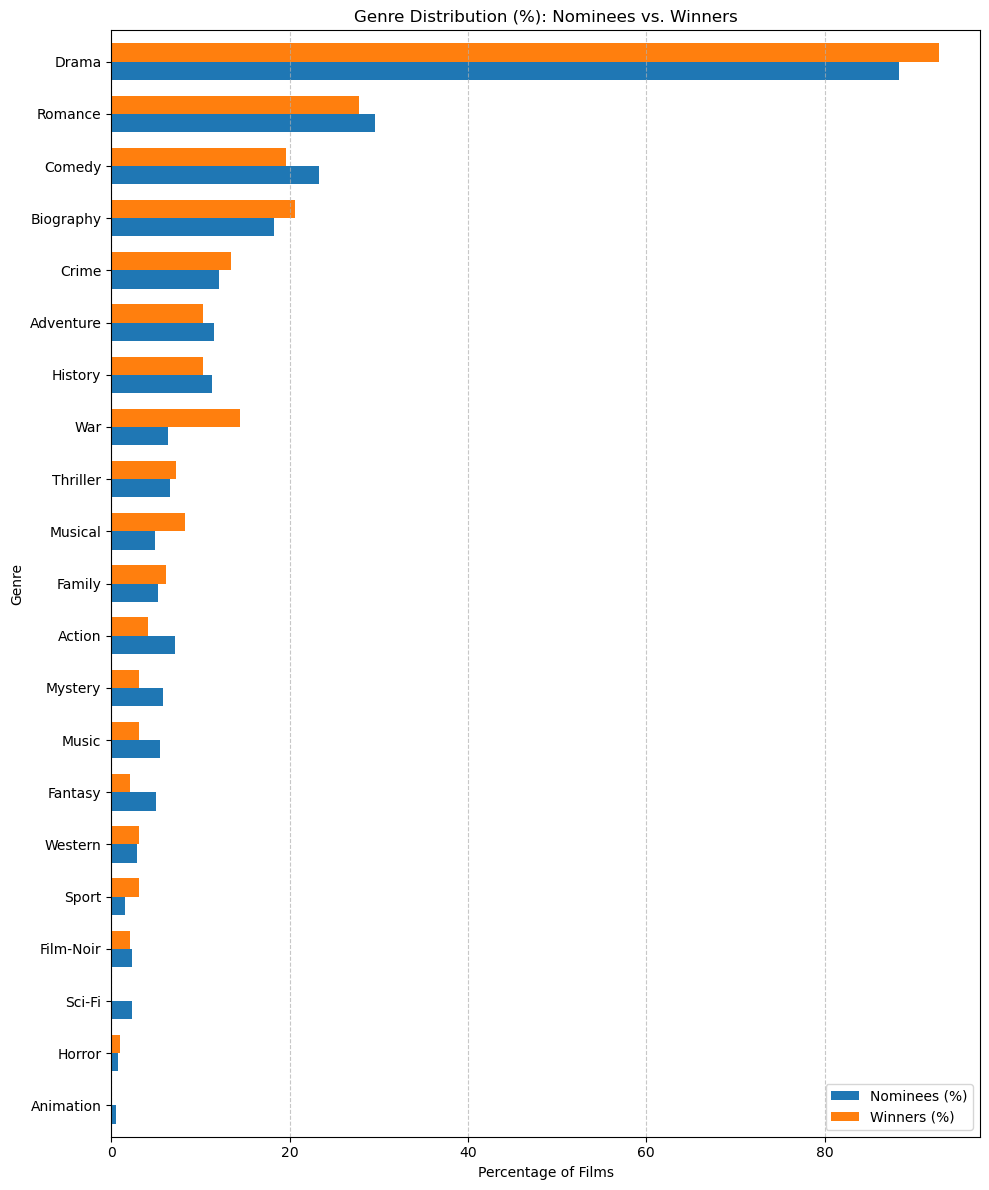

In [15]:
def get_genre_counts(data):
    exploded = data.assign(genres=data['genres'].str.split(',')).explode('genres')
    return exploded['genres'].value_counts()

nominees_pandas = nominees_df.to_pandas()
winners_pandas = winners_df.to_pandas()
nominee_genres = get_genre_counts(nominees_pandas)
winner_genres = get_genre_counts(winners_pandas)


nominee_percent = nominee_genres / len(nominees_pandas) * 100
winner_percent = winner_genres / len(winners_pandas) * 100

df_genres = pd.DataFrame({
    'Nominees (%)': nominee_percent,
    'Winners (%)': winner_percent
}).fillna(0)


df_genres['Average'] = (df_genres['Nominees (%)'] + df_genres['Winners (%)']) / 2
df_genres = df_genres.sort_values('Average', ascending=True).drop(columns='Average')

ax = df_genres.plot(kind='barh', figsize=(10, 12), width=0.7)
plt.title('Genre Distribution (%): Nominees vs. Winners')
plt.xlabel('Percentage of Films')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
plt.close()

The top genres are the same among winners and nominees and with similar proportions, 85-90% for dramas, 30% for romance and 20% for comedy. A more interesting aspect is over and under representation among winners which could give us an hint on genres being favored or not. Two noticeable examples of over representation ar war and sports movies respectively jumping from 7 to 17% and from 1 to 4%. On the other hand genres such as action, mystery or fantasy have an apparent drop in winners representation. Sci-Fi and animation movies even disappear from the winners list.